# Final Project 2: Exploratory Data Analysis on University Rankings

This case study consists of 3 parts: 


A. Data understanding and exploration
- Student to decide how to explore, inspect and cleanse the data 

B. Questions: 6 in total
- Answer the questions and derive the requested outputs with necessary explanations and inferences 

C. Open-ended Question 
- Student to decide the scope and methods/packages to use to answer the question and derive insights

The data reflects four years of ranking, 2012, 2013, 2014, 2015; 2012 and 2013 consists of the top 100 universities while 2014, and 2015 are the top 1000 universities. The data could be assessed on a yearly basis to uncover trends. 

The data was collected by The Center for World University Rankings. Sampling was weighted based on the following criteria: research output, (10%), high-quality publication, (10%), influence, (10%), citations, (10%), quality of faculty, (10%), alumni employment, (25%), quality of education, (25%). The totals of the above criteria is then used te create an aggregation and scoring. 

Data dictionary:
- World_rank - World rank for the university.
- Institution - Name of the university.
- Country - Country of each university.
- National_Rank - Rank of university within its country.
- Quality_of_education - Rank for quality of education; measured by the number of a university's alumni who have garnered major international accolades, i.e. Pulitzer, Nobel Prize.
- Alumni_employment - Rank for alumni employment; measured by the number of a university's alumni who have held CEO positions at multinational companies in relation to the university's size.
- Quality_of_faculty - Rank for quality of faculty; measured by the number of faculty who have won major international awards.
- Publications - Rank for publications.
- Influence - Rank for influence.
- Citations - Rank for citations.
- Broad_impact - Rank for broad impact (only available for 2014 and 2015).
- Patents - Rank for patents.
- Score - Total score, used for determining world rank.
- Year - Years of ranking (2012 to 2015).

# A. Data Understanding and exploration

### Read the cwur.Data.csv file and inspect the data, understand the data (what are the components, how it looks like, and some basic statistics about the variables). Take necessary steps to address any problems or issues with the data and fix them with appropriate measures.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as offline

In [2]:
datacwur = pd.read_csv("cwurData.csv") #Read cwurData.csv as a dataframe called datacwur
datacwur.info() #prints information about the DataFrame including the index dtype and columns, non-null values and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [3]:
datacwur.head() #Check the head of the DataFrame

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [4]:
datacwur.tail() #Check the tail of the DataFrame

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [5]:
datacwur.isnull().sum() # count the number of missing values in each Series

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [6]:
datacwur['broad_impact'] =  datacwur['broad_impact'].fillna(0).astype('int64')
datacwur.info()
# Replace NaN Values with Zeros and convert the column into int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2200 non-null   int64  
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 240.8+ KB


In [7]:
duplicateRows = datacwur[datacwur.duplicated()]
print(duplicateRows)
#check for any duplication

Empty DataFrame
Columns: [world_rank, institution, country, national_rank, quality_of_education, alumni_employment, quality_of_faculty, publications, influence, citations, broad_impact, patents, score, year]
Index: []


# B. Questions
### Answer the questions below based on the dataset. 

### 1. Focusing only on rows with world_rank smaller and inclusive of 100: Which country (throughout all years) has the most number universities within top 100 of world_rank? Let's call count of universities within top100 as 'count_100'. What are the top 10 countries by value of count_100, and what is count_100 for each of these countries?

In [8]:
datacwur.drop(datacwur[datacwur['world_rank'] > 100].index, inplace = True) 
datacwur

#filter out rows with world_rank more than 100 

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,96,University of Zurich,Switzerland,4,115,389,85,56,46,68,56,137,51.14,2015
1296,97,Arizona State University,USA,55,367,455,66,143,85,76,140,21,51.13,2015
1297,98,Yonsei University,South Korea,2,367,45,218,140,326,321,235,23,51.02,2015
1298,99,University of Oslo,Norway,1,53,286,40,106,134,101,102,302,50.81,2015


In [9]:
count_100 = datacwur['country'].value_counts()
count_100
#USA is the country that has the most number universities within top 100 of world_rank

USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
Sweden              5
South Korea         5
Denmark             4
China               4
Norway              3
Italy               3
Russia              3
Singapore           3
Taiwan              2
Finland             2
Belgium             2
Name: country, dtype: int64

In [10]:
Top_10 = count_100.head(10)
Top_10

USA               223
United Kingdom     29
Japan              26
France             18
Switzerland        16
Israel             14
Canada             13
Germany            11
Australia           8
Netherlands         6
Name: country, dtype: int64

### 2. For the top 10 countries with largest amount of top100 universities, What is the percentage composition of each countries' count_100 out of the 10 countries? (ie. the 10 countries make up 100%) 

In [11]:
df = pd.DataFrame(Top_10) #convert to DataFrame
print(df)

                country
USA                 223
United Kingdom       29
Japan                26
France               18
Switzerland          16
Israel               14
Canada               13
Germany              11
Australia             8
Netherlands           6


In [12]:
df = df.reset_index()
df

,index,country
0,USA,223
1,United Kingdom,29
2,Japan,26
3,France,18
4,Switzerland,16
5,Israel,14
6,Canada,13
7,Germany,11
8,Australia,8
9,Netherlands,6


In [13]:
df.columns = ['country','count_100']
print(df)

          country  count_100
0             USA        223
1  United Kingdom         29
2           Japan         26
3          France         18
4     Switzerland         16
5          Israel         14
6          Canada         13
7         Germany         11
8       Australia          8
9     Netherlands          6


In [14]:
df['percentage'] = (df['count_100'] / df['count_100'].sum()) * 100
df

,country,count_100,percentage
0,USA,223,61.263736
1,United Kingdom,29,7.967033
2,Japan,26,7.142857
3,France,18,4.945055
4,Switzerland,16,4.395604
5,Israel,14,3.846154
6,Canada,13,3.571429
7,Germany,11,3.021978
8,Australia,8,2.197802
9,Netherlands,6,1.648352


### 3. Plot a graph showing the top 5 countries from Q2 and their counts

In [15]:
df.head(5)

,country,count_100,percentage
0,USA,223,61.263736
1,United Kingdom,29,7.967033
2,Japan,26,7.142857
3,France,18,4.945055
4,Switzerland,16,4.395604


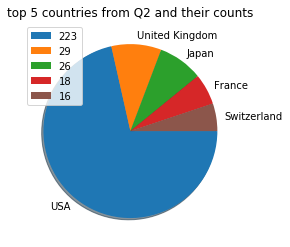

In [16]:
country_data = df.head(5)['country']
count_data = df.head(5)['count_100']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0, 0, 0, 0)  
plt.pie(count_data, labels=country_data, explode=explode, colors=colors,counterclock=False, shadow=True)
plt.title("top 5 countries from Q2 and their counts")
plt.legend(count_data)
plt.show()
    

### 4. Groupby year and country showing the count of universities with world_rank within top 100 for that country and year. Set the name for column of counts as 'count_top100'. Sort the year in ascending order while count_top100 in descending order. See the table below as example output.

In [17]:
count_top100 = datacwur.groupby(['year','country']).size()
count_top100

year  country       
2012  Australia          2
      Canada             3
      Denmark            1
      Finland            1
      France             5
                        ..
2015  Sweden             1
      Switzerland        4
      Taiwan             1
      USA               55
      United Kingdom     7
Length: 72, dtype: int64

In [18]:
df = pd.DataFrame(count_top100) #convert to DataFrame
df

0
year country           
2012 Australia        2
     Canada           3
     Denmark          1
     Finland          1
     France           5
...                  ..
2015 Sweden           1
     Switzerland      4
     Taiwan           1
     USA             55
     United Kingdom   7

[72 rows x 1 columns]

In [19]:
df.columns = ['count_top100']
print(df)

                     count_top100
year country                     
2012 Australia                  2
     Canada                     3
     Denmark                    1
     Finland                    1
     France                     5
...                           ...
2015 Sweden                     1
     Switzerland                4
     Taiwan                     1
     USA                       55
     United Kingdom             7

[72 rows x 1 columns]


In [20]:
df.sort_values(['year', 'count_top100'], ascending=[True, False])

count_top100
year country                     
2012 USA                       58
     United Kingdom             8
     France                     5
     Japan                      5
     Israel                     4
...                           ...
2015 Norway                     1
     Russia                     1
     Singapore                  1
     Sweden                     1
     Taiwan                     1

[72 rows x 1 columns]

### 5. Use an appropriate visual chart to display the trend for the count of top 100 universities for Japan, China and Singapore for years 2012 - 2015 in a single chart.

In [21]:
df = df.reset_index()
df

,year,country,count_top100
0,2012,Australia,2
1,2012,Canada,3
2,2012,Denmark,1
3,2012,Finland,1
4,2012,France,5
...,...,...,...
67,2015,Sweden,1
68,2015,Switzerland,4
69,2015,Taiwan,1
70,2015,USA,55


In [22]:
df.columns = ['year','country','count_top100']
print(df)

    year         country  count_top100
0   2012       Australia             2
1   2012          Canada             3
2   2012         Denmark             1
3   2012         Finland             1
4   2012          France             5
..   ...             ...           ...
67  2015          Sweden             1
68  2015     Switzerland             4
69  2015          Taiwan             1
70  2015             USA            55
71  2015  United Kingdom             7

[72 rows x 3 columns]


In [23]:
df = df.loc[df['country'].isin(['Japan','China','Singapore'])]
df

,year,country,count_top100
8,2012,Japan,5
24,2013,Japan,6
28,2013,Singapore,1
37,2014,China,2
43,2014,Japan,8
46,2014,Singapore,1
56,2015,China,2
61,2015,Japan,7
65,2015,Singapore,1


Text(0, 0.5, 'Total number of universities')

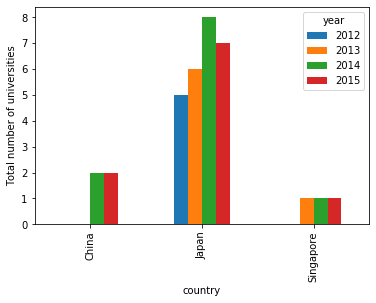

In [24]:
pd.pivot_table(df, index ='country', columns ='year',values='count_top100').plot(kind='bar')
plt.ylabel('Total number of universities')

### 6. For top 10 universities in 2015, what was the trend for world_rank for those universities across all the years? Which universities generally improved, and which ones declined in world_rank? Use an appropriate visual to show the trend and explain the results.

In [25]:
top10_2015 = datacwur.loc[datacwur['year'] == 2015].head(10)
top10_2015


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1,3,100.00,2015
1201,2,Stanford University,USA,2,9,2,4,5,3,3,4,10,98.66,2015
1202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2,1,97.54,2015
1203,4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13,48,96.81,2015
1204,5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9,15,96.46,2015
1205,6,Columbia University,USA,4,13,6,9,13,13,11,12,4,96.14,2015
1206,7,"University of California, Berkeley",USA,5,5,21,6,10,4,4,7,29,92.25,2015
1207,8,University of Chicago,USA,6,11,14,8,17,16,12,22,141,90.70,2015
1208,9,Princeton University,USA,7,4,15,3,72,25,24,33,225,89.42,2015
1209,10,Cornell University,USA,8,12,18,14,24,15,25,22,11,86.79,2015


In [26]:
df = datacwur.loc[datacwur['institution'].isin(top10_2015['institution'])]
#filtering out the universities from 2012-2015 based on the top10_2015 world ranking

Text(0, 0.5, 'World Ranking')

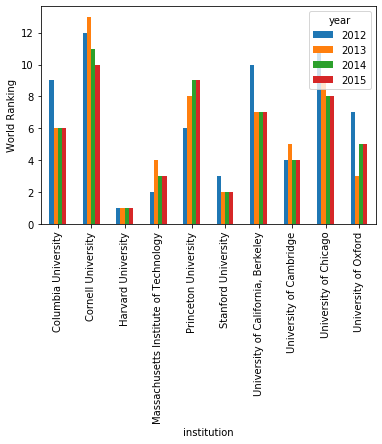

In [27]:
pd.pivot_table(df, index = 'institution',columns ='year',values = 'world_rank').plot(kind='bar')                                                                            
plt.ylabel('World Ranking')

# Columbia,Cornell, Stanford, Berkeley, Chicago and Oxford improved in ranking
# Princeton University, MIT declined in world ranking

# C. OPEN ENDED QUESTION (Choose 1 among the following)
### Option 1: What are some of the factors (variables) that may be related to the world_rank and/or score? Is there any trends indicating shift in importance of factors influencing world_rank over the years or between countries? 

### Option 2: What are the relationships between the factors (variables) themselves? Is there any interesting patterns that can be detected? You may also choose to discuss yearly or country trends or a mixture of both. 

### For either of the above, you may choose to pick around 3-4 factors to deep-dive (how many factors to analyse is up to you). Additionally, if there's any other interesting insights about the data, you may also include in your analysis. 

In [28]:
datacwur = pd.read_csv("cwurData.csv")
datacwur.sort_values(by=['quality_of_education'])
#high quality of education doesn't really translate to good alumni employment.
#generally a good quality of education translates to a high world ranking

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
20,21,Rockefeller University,USA,15,1,101,16,101,28,96,NaN,101,61.74,2012
1200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,3,100.00,2015
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
100,1,Harvard University,USA,1,1,1,1,1,1,1,NaN,7,100.00,2013
103,4,Massachusetts Institute of Technology,USA,3,2,16,2,16,3,3,NaN,1,91.45,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,529,Shinshu University,Japan,30,367,517,218,594,602,368,486.0,244,44.70,2015
1729,530,University of Science and Technology Beijing,China,29,367,121,218,542,937,511,886.0,408,44.70,2015
1731,532,Mahidol University,Thailand,2,367,567,218,476,372,368,447.0,861,44.69,2015
1721,522,University of Mississippi - Oxford Campus,USA,164,367,567,218,508,851,428,424.0,611,44.70,2015
